In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('amazon_reviews.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4915 entries, 0 to 4914
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            4915 non-null   int64  
 1   reviewerName          4914 non-null   object 
 2   overall               4915 non-null   float64
 3   reviewText            4914 non-null   object 
 4   reviewTime            4915 non-null   object 
 5   day_diff              4915 non-null   int64  
 6   helpful_yes           4915 non-null   int64  
 7   helpful_no            4915 non-null   int64  
 8   total_vote            4915 non-null   int64  
 9   score_pos_neg_diff    4915 non-null   int64  
 10  score_average_rating  4915 non-null   float64
 11  wilson_lower_bound    4915 non-null   float64
dtypes: float64(3), int64(6), object(3)
memory usage: 460.9+ KB


In [2]:
df = df.drop(columns=['Unnamed: 0'])
df.head()

,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,NaN,4.0,No issues.,2014-07-23,138,0,0,0,0,0.0,0.0
1,0mie,5.0,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0
2,1K3,4.0,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0
3,1m2,5.0,This think has worked out great.Had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.0
4,2&amp;1/2Men,5.0,"Bought it with Retail Packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.0


In [3]:
df.rename(columns={
    'overall': 'userScore'
}, inplace=True)

df.head()

,reviewerName,userScore,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,NaN,4.0,No issues.,2014-07-23,138,0,0,0,0,0.0,0.0
1,0mie,5.0,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0
2,1K3,4.0,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0
3,1m2,5.0,This think has worked out great.Had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.0
4,2&amp;1/2Men,5.0,"Bought it with Retail Packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.0


In [4]:
col = ['reviewText', 'userScore']
df = df[col]
df.head()

,reviewText,userScore
0,No issues.,4.0
1,"Purchased this for my device, it worked as adv...",5.0
2,it works as expected. I should have sprung for...,4.0
3,This think has worked out great.Had a diff. br...,5.0
4,"Bought it with Retail Packaging, arrived legit...",5.0


In [5]:
df.dropna(subset='reviewText', inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4914 entries, 0 to 4914
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   reviewText  4914 non-null   object 
 1   userScore   4914 non-null   float64
dtypes: float64(1), object(1)
memory usage: 115.2+ KB


In [7]:
df = df.reset_index().rename(columns={'index': 'id'})
df.head()

,id,reviewText,userScore
0,0,No issues.,4.0
1,1,"Purchased this for my device, it worked as adv...",5.0
2,2,it works as expected. I should have sprung for...,4.0
3,3,This think has worked out great.Had a diff. br...,5.0
4,4,"Bought it with Retail Packaging, arrived legit...",5.0


In [8]:
df.tail()

,id,reviewText,userScore
4909,4910,I bought this Sandisk 16GB Class 10 to use wit...,1.0
4910,4911,Used this for extending the capabilities of my...,5.0
4911,4912,Great card that is very fast and reliable. It ...,5.0
4912,4913,Good amount of space for the stuff I want to d...,5.0
4913,4914,I've heard bad things about this 64gb Micro SD...,5.0


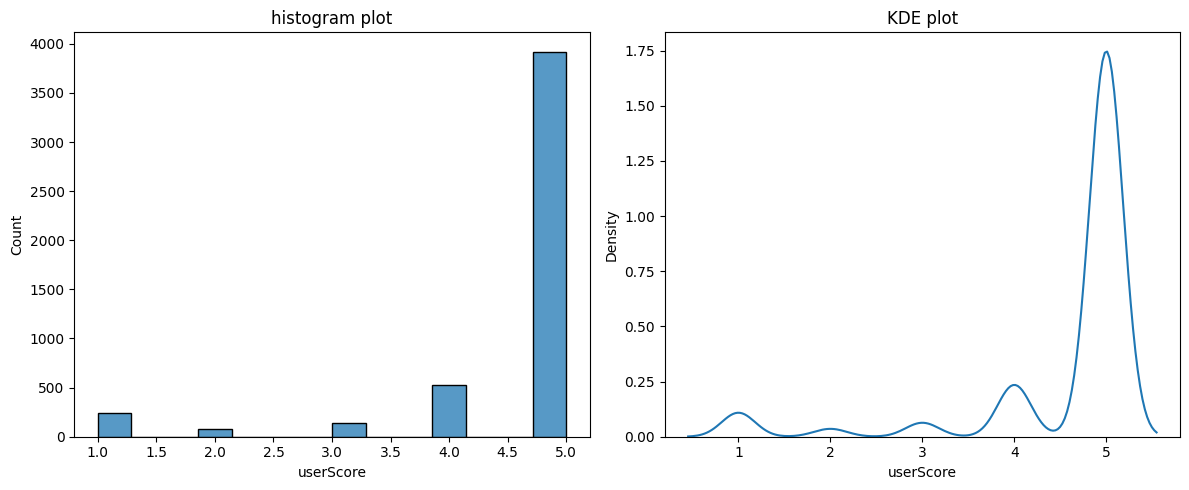

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
sns.histplot(data=df, x='userScore', ax=ax[0]).set_title('histogram plot')
sns.kdeplot(data=df, x='userScore', ax=ax[1]).set_title('KDE plot')
plt.tight_layout()
plt.show()

In [10]:
df_sent = df.copy()

import nltk
# nltk.download('averaged_perceptron_tagger')
test = df_sent['reviewText'][5]
token_test = nltk.word_tokenize(test)
test_pos_tag = nltk.pos_tag(token_test[:5])
test_pos_tag

[('It', 'PRP'), ("'s", 'VBZ'), ('mini', 'JJ'), ('storage', 'NN'), ('.', '.')]

In [24]:
from nltk.sentiment import SentimentIntensityAnalyzer

sarcasm_text = 'yeah, way to wear a raincoat genius'

sia = SentimentIntensityAnalyzer()
sia.polarity_scores(sarcasm_text)

{'neg': 0.0, 'neu': 0.694, 'pos': 0.306, 'compound': 0.296}

In [26]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [29]:
MODEL = "roberta-large"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

100%|██████████| 1425941629/1425941629 [04:10<00:00, 5686790.36B/s]


In [35]:
def roberta_score(review):
    encoded_text = tokenizer(review, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg': scores[0],
        'roberta_neu': scores[1],
        'roberta_pos': scores[2],
    }
    return scores_dict

In [36]:
res = {}
for i, row in df.iterrows():
    try:
        text = row['reviewText']
        my_id = row['id']
        roberta_score_result = roberta_score(text)
        score_ = {**roberta_score_result}
        res[my_id] = score_
    except RuntimeError:
        print(f'comment is too long for Roberta to handle for id {my_id}')

TypeError: 'RobertaTokenizer' object is not callable

In [37]:
df_roberta = pd.DataFrame(res).T
df_roberta

df_roberta.reset_index(inplace=True)
df_roberta


df_sent = pd.merge(df, df_roberta, how='inner', left_on='id', right_on='index')
df_sent

df_sent.sort_values(by='roberta_pos', ascending=False).values[0]

df_sent.sort_values(by='roberta_neg', ascending=False).values[0]

KeyError: 'roberta_pos'

ValueError: Could not interpret value `roberta_pos` for `x`. An entry with this name does not appear in `data`.

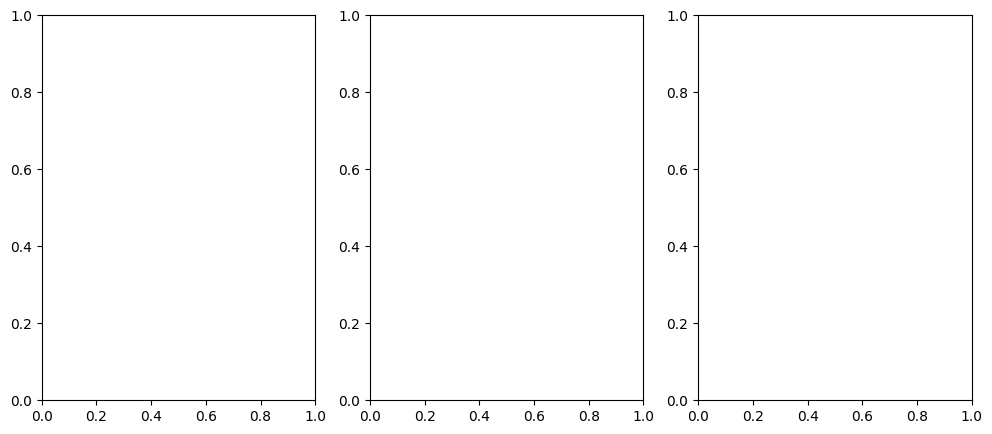

In [38]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,5))

sns.histplot(data=df_sent, x='roberta_pos', ax=ax[0]).set_title('Roberta Positive')
sns.histplot(data=df_sent, x='roberta_neu', ax=ax[1]).set_title('Roberta Neutral')
sns.histplot(data=df_sent, x='roberta_neg', ax=ax[2]).set_title('Roberta Negative')

plt.tight_layout()
plt.show()